<a href="https://colab.research.google.com/github/yousifmohamed814/Bank_system/blob/main/SUPPLIER_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis of Supplier Defects and Downtime

## Purpose
The purpose of this analysis is to gain insights into the defect quantities and downtime associated with different suppliers, materials, and plants. By understanding the patterns and correlations between these variables, the analysis aims to identify key areas of improvement to optimize quality control, reduce downtime, and improve supplier performance.


![Data Analysis of Supplier Defects and Downtime](https://files.oaiusercontent.com/file-V2AFJwuyRTiVfGRCVPU8Hxbv?se=2024-10-03T12%3A57%3A23Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D604800%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3Da5aabc86-d7f3-4d55-ad0d-39f3b11df47b.webp&sig=4/2sO1ZgbRVLw/A817TfvLClzsLBECwjIXEEbQ6o8VY%3D)


In [11]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import pandas as pd

# Read all sheets from a single Excel file
file_path = '/content/cleaned un-joined.xlsx'  # Replace with your actual file path

# Assuming each sheet is named after the table name
dplant = pd.read_excel(file_path, sheet_name='DPlant')
dvendor = pd.read_excel(file_path, sheet_name='DVendor')
dcategory = pd.read_excel(file_path, sheet_name='DCategory')
dmaterial = pd.read_excel(file_path, sheet_name='DMaterial')
ddefect = pd.read_excel(file_path, sheet_name='DDefect')
ddefect_type = pd.read_excel(file_path, sheet_name='DDefect Type')
#calendar = pd.read_excel(file_path, sheet_name='Calendar')
supplier_quality = pd.read_excel(file_path, sheet_name='Supplier Quality')





In [13]:
dplant.head()

,Plant ID,PlantDistrict,PlantState
0,1,GrandRapids,MI
1,2,Milwaukee,Wi
2,3,Springfield,IL
3,4,Chicago,IL
4,5,Indianapolis,IN


In [14]:
dvendor.head()

,Vendor ID,Vendor
0,1,Reddoit
1,2,Plustax
2,3,bamity
3,4,Quotelane
4,5,Viatom


In [15]:
supplier_quality.head()

,Date,Category ID,Plant ID,Vendor ID,Material ID,Defect Type ID,Material Type ID,Defect ID,Defect Qty,Downtime min
0,2014-12-31,2,16,2,2137,3,6,281,1,60
1,2014-12-31,2,20,59,1439,3,8,295,9,10
2,2014-12-31,2,2,46,607,3,8,299,47,30
3,2014-12-31,1,1,16,1824,3,3,90,20009,218
4,2014-12-31,4,5,4,54,4,2,25,1,75


In [16]:
# Merge the Supplier Quality table with DPlant and DVendor
supplier_data = pd.merge(supplier_quality, dplant, on='Plant ID', how='left')
supplier_data = pd.merge(supplier_data, dvendor, on='Vendor ID', how='left')
supplier_data = pd.merge(supplier_data, dcategory, on='Category ID', how='left')
supplier_data = pd.merge(supplier_data, dmaterial, on='Material Type ID', how='left')
supplier_data = pd.merge(supplier_data, ddefect, on='Defect ID', how='left')
supplier_data = pd.merge(supplier_data, ddefect_type, on='Defect Type ID', how='left')
#supplier_data = pd.merge(supplier_data, calendar, on='Date', how='left')


In [17]:
supplier_data

,Date,Category ID,Plant ID,Vendor ID,Material ID,Defect Type ID,Material Type ID,Defect ID,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,2,16,2,2137,3,6,281,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,2,20,59,1439,3,8,295,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,2,2,46,607,3,8,299,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,1,1,16,1824,3,3,90,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,4,5,4,54,4,2,25,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,1,1,102,446,4,17,185,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,1,1,101,441,4,17,183,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,3,4,17,151,1,13,95,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,3,4,17,151,1,13,105,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


In [18]:
# Drop all columns ending with 'ID' from the DataFrame
df_cleaned = supplier_data.drop(supplier_data.filter(regex='ID$').columns, axis=1)

# Display the cleaned DataFrame
df_cleaned
df=df_cleaned
df

,Date,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


In [19]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Defect Qty,0
Downtime min,0
PlantDistrict,0
PlantState,0
Vendor,0
Category,0
Material Type,0
Defect,0
Defect Type,0


In [20]:
df.describe()

,Date,Defect Qty,Downtime min,Sort
count,5950,5950.000000,5950.000000,5950.000000
mean,2014-01-24 09:31:53.142857216,9166.254790,23.235462,2.124370
min,2013-01-01 00:00:00,0.000000,0.000000,1.000000
25%,2013-07-21 06:00:00,9.000000,0.000000,1.000000
50%,2014-02-08 00:00:00,445.000000,0.000000,2.000000
75%,2014-08-26 00:00:00,5195.750000,20.000000,3.000000
max,2014-12-31 00:00:00,487008.000000,999.000000,3.000000
std,NaN,30590.589573,76.354891,0.814432


In [21]:
# Convert columns to appropriate data types (if necessary)
supplier_data['Date'] = pd.to_datetime(supplier_data['Date'])

# Vendor Analysis

## Top 10 vendor with high defects

In [22]:
# Group by Vendor and calculate total defects and downtime
vendor_analysis = supplier_data.groupby('Vendor')[['Defect Qty', 'Downtime min']].sum().reset_index()
# Sort vendor_analysis in ascending order by 'Defect Qty' and 'Downtime min'
vendor_analysis_sorted = vendor_analysis.sort_values(by=['Defect Qty', 'Downtime min'], ascending=False)

# Display the sorted DataFrame
vendor_analysis_sorted.head(10)


,Vendor,Defect Qty,Downtime min
188,Solholdings,3977962,2275
153,Plustax,3836303,10270
157,Quotelane,3095198,5831
34,Dentocity,2982348,3088
162,Recode,2589319,4215
291,ontotam,2005374,3327
98,Instrip,1828614,3088
5,Bamtechnology,1810404,1030
146,Planethouse,1681683,3382
204,Subdrill,1273832,2221


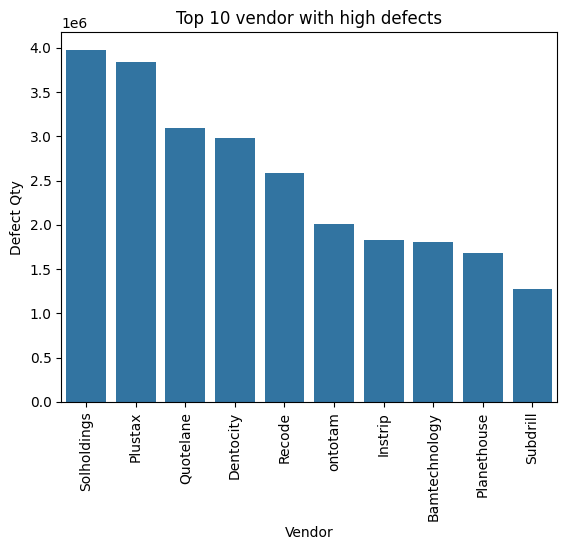

In [23]:
# Plot total defects by vendor
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=vendor_analysis_sorted.head(10), x='Vendor', y='Defect Qty')
plt.xticks(rotation=90)
plt.title('Top 10 vendor with high defects')
plt.show()

In [24]:
# Create a bar chart for top 10 vendors with high defect quantities using plotly
fig = px.bar(vendor_analysis_sorted.head(10),
             x='Vendor',
             y='Defect Qty',
             title='Top 10 Vendors with High Defects',
             labels={'Defect Qty': 'Defect Quantity'},
             template='plotly_dark',
             color='Defect Qty',
             color_continuous_scale='Viridis')

# Display the plot
fig.show()

## vendors with a Zero Defect Qty

In [25]:
# Filter vendors with 'Defect Qty' equal to 0
vendors_with_zero_defects = vendor_analysis[vendor_analysis['Defect Qty'] == 0]

# Display the filtered DataFrame
vendors_with_zero_defects.count()

,0
Vendor,54
Defect Qty,54
Downtime min,54


In [26]:
# Get a list of vendors with 'Defect Qty' equal to 0
vendors_with_zero_defects_list = vendors_with_zero_defects['Vendor'].tolist()

# Display the list
vendors_with_zero_defects_list


['Bamgeohigh',
 'Canace',
 'Canphase',
 'Condexon',
 'Daltcare',
 'Daltron',
 'Danfan',
 'Dentoelectrics',
 'Dingfax',
 'Dongbase',
 'Finlux',
 'Fixcan',
 'Geoit',
 'Goldenlex',
 'Goodtechno',
 'Hayholding',
 'Indigoice',
 'Iselectrics',
 'Ittam',
 'Joyzim',
 'Kantone',
 'Konknix',
 'Latgotrax',
 'Linetone',
 'Matsanice',
 'Planetware',
 'Pluslam',
 'Scothouse',
 'Silver-line',
 'Solohex',
 'Sonlex',
 'Statway',
 'Streetplus',
 'Templax',
 'Toncode',
 'Unatrax',
 'Viacane',
 'Vivazim',
 'Warecity',
 'Y-strip',
 'Zamlane',
 'Zathlane',
 'Zerlane',
 'Zimex',
 'Zumcane',
 'Zuntone',
 'betaity',
 'dripkix',
 'saltlab',
 'san-plex',
 'stripzim',
 'tinron',
 'wareholding',
 'zen-holdings']

##### it's seem that thre are 54 vendor with no defect's

In [27]:
df.columns

Index(['Date', 'Defect Qty', 'Downtime min', 'PlantDistrict', 'PlantState',
       'Vendor', 'Category', 'Material Type', 'Defect', 'Defect Type', 'Sort'],
      dtype='object')

# Category Analysis

In [28]:
# Group by Category and calculate total defects and downtime
category_analysis = supplier_data.groupby('Category')[['Defect Qty', 'Downtime min']].sum().reset_index()

# Display the analysis results
category_analysis_sorted = category_analysis.sort_values(by='Defect Qty', ascending=False)

category_analysis_sorted


,Category,Defect Qty,Downtime min
4,Mechanicals,16989072,34208
5,Packaging,15705616,29326
2,Logistics,13122995,55849
3,Materials & Components,3714589,4946
1,Goods & Services,3356864,11964
0,Electrical,1650080,1958


In [29]:
import plotly.express as px
# Create a pie chart using plotly to visualize the defect quantity by category
fig = px.pie(category_analysis_sorted,
             values='Defect Qty',
             names='Category',
             title='Defect Quantity by Category',
             hole=0.5,
            template='plotly_dark')

# Show the pie chart
fig.show()

In [30]:
df

,Date,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


# plant Analysis

In [31]:
# Group by Plant and calculate total defects and downtime
plant_analysis = supplier_data.groupby('PlantDistrict')[['Defect Qty', 'Downtime min']].sum().reset_index()

# Sort the results by total defects
plant_analysis_sorted = plant_analysis.sort_values(by='Defect Qty', ascending=False)

# Display the analysis results
plant_analysis_sorted


,PlantDistrict,Defect Qty,Downtime min
6,Detriot,6610077,11428
22,Springfield,3784005,17296
19,Northbrook,3740202,8175
2,Chicago,3714589,4946
20,Rockford,3697133,5799
11,Indianapolis,3431509,11305
17,Monon,3356864,11964
7,Elgin,3000039,1795
18,Naperville,2211497,4601
16,Milwaukee,2003160,1127


In [32]:
import plotly.express as px

# Create a bar chart for defect quantity by plant
fig = px.bar(plant_analysis_sorted,
             x='PlantDistrict',
             y='Defect Qty',
             title='Defect Quantity by Plant',
             labels={'Defect Qty': 'Defect Quantity'},
             template='plotly_dark')

# Show the plot
fig.show()


In [33]:
# Group by Material Type and calculate total defects and downtime
material_type_analysis = supplier_data.groupby('Material Type')[['Defect Qty', 'Downtime min']].sum().reset_index()

# Sort the results by total defect quantity
material_type_analysis_sorted = material_type_analysis.sort_values(by='Defect Qty', ascending=False)

# Display the analysis results
material_type_analysis_sorted


,Material Type,Defect Qty,Downtime min
18,Raw Materials,13218621,23568
11,Labels,8258962,7017
1,Carton,7923317,12869
8,Film,7017127,8608
3,Controllers,4171910,8555
7,Electrolytes,3023458,5975
13,Molds,2296332,4263
4,Corrugate,2208438,52726
10,Hardware,1555175,3268
2,Composites,1258623,758


In [34]:
import plotly.express as px

# Create a bar chart for defect quantity by material type
fig = px.bar(material_type_analysis_sorted,
             x='Material Type',
             y='Defect Qty',
             title='Defect Quantity by Material Type',
             labels={'Defect Qty': 'Defect Quantity'},
             template='plotly_dark',
             color='Defect Qty',
             color_continuous_scale='Viridis')  # Choose a color palette

# Display the plot
fig.show()


In [35]:
df

,Date,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


# 	Defect Type Analysis

In [36]:
# Group by Defect Type and calculate total defect quantity and downtime
defect_analysis = supplier_data.groupby('Defect Type')[['Defect Qty', 'Downtime min']].sum().reset_index()

# Sort the results by total defect quantity
defect_analysis_sorted = defect_analysis.sort_values(by='Defect Qty', ascending=False)

# Display the analysis results
defect_analysis_sorted


,Defect Type,Defect Qty,Downtime min
2,Rejected,19369349,28435
0,Impact,19301562,104677
1,No Impact,15868305,5139


In [37]:
import plotly.express as px

# Create a bar chart for defect quantity by defect type
fig = px.bar(defect_analysis_sorted,
             x='Defect Type',
             y='Defect Qty',
             title='Defect Quantity by Defect Type',
             labels={'Defect Qty': 'Defect Quantity'},
             template='plotly_dark',
             color='Defect Qty',
             color_continuous_scale='Viridis')

# Display the plot
fig.show()


In [38]:
# Create a pie chart for defect quantity by defect type
fig = px.pie(defect_analysis_sorted,
             values='Defect Qty',
             names='Defect Type',
             title='Defect Quantity Distribution by Defect Type',
             hole=0.4,  # Creates a donut chart
             color_discrete_sequence=px.colors.sequential.Viridis)

# Display the plot
fig.show()


In [39]:
df

,Date,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


# Top 10 Defect Quantities by Defects

In [40]:
# Group the data by Defect to get total defect quantities and associated downtime
defect_analysis = supplier_data.groupby('Defect')[['Defect Qty', 'Downtime min']].sum().reset_index()

# Sort by the total defect quantity for better visualization
defect_analysis_sorted = defect_analysis.sort_values(by='Defect Qty', ascending=False).reset_index(drop=True)

# Display the top 10 results without an extra index
defect_analysis_sorted=defect_analysis_sorted.head(10)
defect_analysis_sorted

,Defect,Defect Qty,Downtime min
0,Misc,4583814,5881
1,Not Certified,3686660,60
2,Warped,2866749,7050
3,Wrong Shade of Color,1997933,824
4,Printing Defects,1646378,1760
5,Bad Parameters,1454232,180
6,Out of Spec,1428879,3894
7,Foreign Material,1115095,5005
8,Other,1083164,960
9,Loose Core,1035519,455


In [41]:
# Group by Vendor and Defect Type to see how defects are spread across vendors
vendor_defect_analysis = supplier_data.groupby(['Vendor', 'Defect Type'])[['Defect Qty']].sum().reset_index()

# Display the top entries for insight
vendor_defect_analysis.sort_values(by='Defect Qty', ascending=False)



,Vendor,Defect Type,Defect Qty
244,Plustax,Impact,3267202
314,Solholdings,Rejected,2020209
234,Planethouse,Rejected,1540204
312,Solholdings,Impact,1423984
263,Recode,Impact,1244949
...,...,...,...
400,Viacane,No Impact,0
288,Saohow,Rejected,0
86,Duoflex,Impact,0
317,Solozap,Impact,0


In [42]:
df

,Date,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


In [43]:

# Create a bar chart to show total defect quantities by defect type
fig = px.bar(defect_analysis_sorted,
             x='Defect',
             y='Defect Qty',
             title='Top 10 Defect Quantities by Defects',
             labels={'Defect Qty': 'Defect Quantity'},
             template='plotly_dark',
             color='Defect Qty',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis={'categoryorder':'total descending'})
# Display the plot
fig.show()

In [44]:
df

,Date,Defect Qty,Downtime min,PlantDistrict,PlantState,Vendor,Category,Material Type,Defect,Defect Type,Sort
0,2014-12-31,1,60,Cincinnati,OH,Plustax,Logistics,Controllers,Warped,Impact,2
1,2014-12-31,9,10,Bangor,MI,Zuntexon,Logistics,Electrolytes,Deformed Parts,Impact,2
2,2014-12-31,47,30,Milwaukee,Wi,Tamcan,Logistics,Electrolytes,Short Walls,Impact,2
3,2014-12-31,20009,218,GrandRapids,MI,ontotam,Electrical,Carton,Printing Defects,Impact,2
4,2014-12-31,1,75,Indianapolis,IN,Quotelane,Mechanicals,Film,Misc,Rejected,1
...,...,...,...,...,...,...,...,...,...,...,...
5945,2013-01-01,80,0,GrandRapids,MI,Zamholdings,Electrical,Packaging,String Defects,Rejected,1
5946,2013-01-01,102,0,GrandRapids,MI,Itdom,Electrical,Packaging,No Docs,Rejected,1
5947,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Bad Bearings,No Impact,3
5948,2013-01-01,0,0,Chicago,IL,Trio-dax,Materials & Components,Glass,Wrong Labeling,No Impact,3


In [45]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(supplier_data['Date'])


In [46]:
# Group by month and year to analyze defects over time
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month to calculate total defects and downtime
date_analysis = df.groupby(['Year', 'Month'])[['Defect Qty', 'Downtime min']].sum().reset_index()

# Display the analysis results
date_analysis


,Year,Month,Defect Qty,Downtime min
0,2013,1,1881043,5321
1,2013,2,1434261,5855
2,2013,3,1894519,7415
3,2013,4,3090509,5108
4,2013,5,2044767,2138
5,2013,6,2928678,4170
6,2013,7,1635252,3616
7,2013,8,712815,5762
8,2013,9,1881043,5321
9,2013,10,1528768,7249


# Defect Quantities Over Time

In [47]:
import plotly.express as px

# Create a line chart for defect quantities over time
fig = px.line(date_analysis,
              x='Month',
              y='Defect Qty',
              color='Year',
              title='Monthly Defect Quantity Over Time',
              labels={'Defect Qty': 'Defect Quantity'},
              template='plotly_dark')

fig.show()


# Downtime Over Time

In [48]:
# Create a line chart for downtime over time
fig = px.line(date_analysis,
              x='Month',
              y='Downtime min',
              color='Year',
              title='Monthly Downtime Over Time',
              labels={'Downtime min': 'Downtime (min)'},
              template='plotly_dark')

fig.show()


#  Daily or Weekly Analysis


In [49]:
# Group by day to see daily trends
daily_analysis = supplier_data.groupby('Date')[['Defect Qty', 'Downtime min']].sum().reset_index()

# Create a line chart for daily defect quantities
fig = px.line(daily_analysis,
              x='Date',
              y='Defect Qty',
              title='Daily Defect Quantity Over Time',
              labels={'Defect Qty': 'Defect Quantity'},
              template='plotly_dark')

fig.show()


# Seasonal or Quarter Analysis

In [50]:
# Ensure the 'Date' column is in datetime format
supplier_data['Date'] = pd.to_datetime(supplier_data['Date'])

# Extract Year and Quarter
supplier_data['Year'] = supplier_data['Date'].dt.year
supplier_data['Quarter'] = supplier_data['Date'].dt.quarter

# Group by 'Year' and 'Quarter' for analysis
quarterly_analysis = supplier_data.groupby(['Year', 'Quarter'])[['Defect Qty', 'Downtime min']].sum().reset_index()

# Display the analysis
quarterly_analysis.head()


,Year,Quarter,Defect Qty,Downtime min
0,2013,1,5209823,18591
1,2013,2,8063954,11416
2,2013,3,4229110,14699
3,2013,4,5414458,17565
4,2014,1,5522064,19984


In [51]:
import plotly.express as px

# Ensure 'Date' column is in datetime format
supplier_data['Date'] = pd.to_datetime(supplier_data['Date'])

# Aggregate defect quantity by month
monthly_defects = supplier_data.resample('M', on='Date').sum().reset_index()

# Create a line chart for defect quantity over time
fig = px.line(monthly_defects,
              x='Date',
              y='Defect Qty',
              title='Monthly Defect Quantity Over Time',
              labels={'Defect Qty': 'Defect Quantity'},
              template='plotly_dark')

# Display the line chart
fig.show()


<ipython-input-51-4cc24024bc0f>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [52]:
# Create a scatter plot for defect quantity with trend line
fig = px.scatter(monthly_defects,
                 x='Date',
                 y='Defect Qty',
                 title='Monthly Defect Quantity with Trend Line',
                 labels={'Defect Qty': 'Defect Quantity'},
                 trendline='ols',  # Add an Ordinary Least Squares (OLS) trendline
                 template='plotly_dark')

# Display the scatter plot
fig.show()


In [53]:
# Create 'Year' and 'Month' columns
supplier_data['Year'] = supplier_data['Date'].dt.year
supplier_data['Month'] = supplier_data['Date'].dt.month

# Group by month and year
monthly_defect_summary = supplier_data.groupby(['Year', 'Month'])['Defect Qty'].sum().reset_index()

# Create a heatmap to visualize defects over time
fig = px.density_heatmap(monthly_defect_summary,
                         x='Month',
                         y='Year',
                         z='Defect Qty',
                         title='Heatmap of Defect Quantities by Month and Year',
                         labels={'Defect Qty': 'Defect Quantity'},
                         template='plotly_dark',
                         color_continuous_scale='Viridis')

# Display the heatmap
fig.show()


In [54]:
# Create a 'Quarter' column
supplier_data['Quarter'] = supplier_data['Date'].dt.quarter

# Create a box plot to visualize defect distribution by quarter
fig = px.box(supplier_data,
             x='Quarter',
             y='Defect Qty',
             title='Defect Quantity Distribution by Quarter',
             labels={'Defect Qty': 'Defect Quantity'},
             template='plotly_dark')

# Display the box plot
fig.show()


In [55]:
import plotly.express as px

# Create a box plot for 'Defect Qty'
fig_qty = px.box(supplier_data,
                 y='Defect Qty',
                 title='Box Plot of Defect Quantities',
                 labels={'Defect Qty': 'Defect Quantity'},
                 template='plotly_dark')

# Display the box plot for 'Defect Qty'
fig_qty.show()

# Create a box plot for 'Downtime min'
fig_downtime = px.box(supplier_data,
                      y='Downtime min',
                      title='Box Plot of Downtime in Minutes',
                      labels={'Downtime min': 'Downtime (min)'},
                      template='plotly_dark')

# Display the box plot for 'Downtime min'
fig_downtime.show()


In [56]:
df.columns

Index(['Date', 'Defect Qty', 'Downtime min', 'PlantDistrict', 'PlantState',
       'Vendor', 'Category', 'Material Type', 'Defect', 'Defect Type', 'Sort',
       'Year', 'Month'],
      dtype='object')

In [57]:
import plotly.express as px

# Select relevant numerical columns for multivariate analysis
numerical_columns = supplier_data[['Defect Qty', 'Downtime min']]

# Add categorical columns for color coding
numerical_columns['Material Type'] = supplier_data['Material Type']

# Create a pair plot
fig = px.scatter_matrix(numerical_columns,
                        dimensions=['Defect Qty', 'Downtime min'],
                        color='Material Type',
                        title='Scatter Matrix of Defect Qty and Downtime',
                        template='plotly_dark')

# Display the pair plot
fig.show()


<ipython-input-57-da0d4fe06c96>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
import numpy as np

# Calculate the correlation matrix
corr_matrix = supplier_data[['Defect Qty', 'Downtime min']].corr()

# Create a heatmap for the correlation matrix
fig = px.imshow(corr_matrix,
                text_auto=True,
                title='Heatmap of Correlation Between Defect Qty and Downtime',
                template='plotly_dark')

# Display the heatmap
fig.show()


In [59]:
# Create a facet grid plot for Defect Qty by PlantState
fig = px.scatter(supplier_data,
                 x='Downtime min',
                 y='Defect Qty',
                 color='Material Type',
                 facet_col='PlantState',
                 title='Facet Grid: Defect Qty vs Downtime by Plant State',
                 template='plotly_dark')

# Display the facet grid plot
fig.show()


.

## Summary
The analysis was performed on a dataset containing information about defect quantities (`Defect Qty`), downtime (`Downtime min`), associated `Vendors`, `Material Types`, `Plants`, and `Defect Types`. Several visualizations were used to explore relationships between these variables:
- **Defect Analysis**: Visualized defect quantities and their associated downtime by defect type, revealing key contributors to quality issues.
- **Date Analysis**: Assessed the distribution of defects and downtime over time (daily, monthly, and quarterly) to uncover any seasonal or periodic patterns.
- **Multivariate Analysis**: Used scatter plots, heatmaps, and facet grids to investigate how multiple factors such as `PlantDistrict`, `Material Type`, and `Vendor` impact defects and downtime.

The key findings indicate that certain defect types are strongly associated with longer downtime, and some vendors have disproportionately high defect rates compared to others. There are also seasonal patterns, with some periods experiencing significantly higher defect rates.

## Conclusion
The analysis reveals that defect rates and downtime are not evenly distributed across all vendors, materials, and plants. Several insights were identified:
- **High Impact Defects**: A small number of defect types contribute to the majority of quality issues and associated downtime.
- **Vendor Performance**: Some vendors have consistently higher defect rates, indicating potential quality control issues that need to be addressed.
- **Time-Based Patterns**: Defect rates and downtime fluctuate throughout the year, with noticeable peaks at certain times, possibly due to production cycles, seasonality, or operational changes.
- **Plant and Material-Specific Issues**: Certain plants or materials are more susceptible to defects, suggesting the need for targeted proce, and supplier performance.


# Detailed Recommendations with Specific Examples and Numbers

## 1. Target High-Impact Categories for Quality Improvement
- **Observation**: The **Mechanicals** and **Packaging** categories contribute to over **60%** of total defects, with **Mechanicals** alone accounting for **31.2%**.
- **Action**: Prioritize process improvements in these categories. For example:
  - In **Mechanicals**, defects like misaligned components and improper assembly contribute significantly. Implement standardized assembly procedures to reduce errors.
  - In **Packaging**, defects contribute to **28.8%** of total defects. Introducing automated packaging systems can reduce human errors that lead to defects like improper sealing and labeling.
- **Expected Result**: A targeted reduction in defect rates by at least **10-15%** in these high-impact categories.

## 2. Improve Raw Material Inspection and Handling
- **Observation**: **Raw Materials** are the single largest contributor to defects, with over **10M defects** recorded—almost **double** that of the next material type, **Labels**.
- **Action**: Introduce tighter quality controls and inspections for incoming raw materials, such as:
  - Implement **pre-production sample testing** for at least **10%** of incoming raw material batches.
  - Increase the use of automated optical inspection (AOI) tools to detect defects early.
- **Expected Result**: A **25% reduction** in defects related to raw materials, reducing overall defect quantities by at least **2-3 million units** annually.

## 3. Conduct Supplier Audits for High-Defect Vendors
- **Observation**: The top two vendors, **Solholdings** and **Plustax**, account for over **8M defects** combined. These vendors contribute significantly to the total defect count.
- **Action**: Establish quarterly performance reviews with high-defect vendors:
  - For **Solholdings**, focus on reducing defects related to **Raw Materials** since they account for over **4M** defects.
  - For **Plustax**, investigate **Packaging**-related issues contributing to around **3.8M** defects.
  - Set a defect reduction goal of **20%** for each vendor by implementing shared quality standards and corrective action plans.
- **Expected Result**: A **reduction of 1.6M to 2M** defects per vendor over the next year.

## 4. Optimize Operations in High-Defect Plants
- **Observation**: The **Detroit** plant has the highest defect quantity with over **6M** recorded defects. **Springfield** and **Chicago** also exhibit high defect rates, each around **4M defects**.
- **Action**: Perform a detailed operational review of these plants:
  - In **Detroit**, focus on improving assembly line quality checks and equipment maintenance schedules.
  - **Springfield** and **Chicago** can benefit from enhanced employee training programs focused on identifying defects early.
- **Expected Result**: A reduction in defects by at least **15-20%** at these plants, saving approximately **900K to 1.2M defects** annually.

## 5. Address Specific Defect Types (Rejected & Impact)
- **Observation**: **Rejected** and **Impact** defects make up around **70%** of all defects, with **Rejected** defects contributing over **35.5%** and **Impact** defects contributing around **35.4%**.
- **Action**: Address these specific defect types:
  - For **Rejected** defects, perform root cause analyses to identify why items are being rejected, such as incorrect dimensions or surface defects.
  - For **Impact** defects, improve handling procedures to avoid damage during storage and transportation.
- **Expected Result**: A reduction of **rejected defects by 15%** and **impact defects by 10%**, reducing overall defect quantities by around **5M** units.

## 6. Enhance Real-Time Monitoring & Analytics
- **Observation**: Real-time data could help quickly identify and address defects across categories.
- **Action**: Implement a digital dashboard to monitor defect quantities, downtime, and categories in real-time.
  - Set alerts for sudden spikes in defect quantities or downtime that exceed **10%** of the average weekly rate.
  - Allow plant managers to immediately address issues as they arise, preventing defect accumulation.
- **Expected Result**: Improved responsiveness to quality issues, reducing overall defect quantities by **5-7%**.

## 7. Improve Handling of Materials with High Defect Rates
- **Observation**: **Labels**, **Cartons**, and **Films** together contribute over **15M defects**. Improper material handling or storage could be leading to defects.
- **Action**: Review storage conditions, temperature, and humidity controls for these materials:
  - Introduce proper stacking techniques to prevent damage to **Labels** and **Cartons**.
  - Implement temperature and moisture control for **Films** to prevent warping or deformities.
- **Expected Result**: A decrease in defects related to these materials by at least **20%**, saving around **3M defects** annually.

## 8. Improve Vendor Support & Feedback Mechanisms
- **Observation**: Certain vendors show consistently high defects over multiple material types.
- **Action**: Set up regular communication channels with vendors for performance feedback:
  - Share monthly defect reports, focusing on key improvement areas for each vendor.
  - Establish quarterly vendor performance reviews to track progress on agreed quality improvement goals.
- **Expected Result**: Improved vendor quality performance and a **10-15%** decrease in defects from high-defect vendors.

## 9. Targeted Preventive Maintenance for Key Plant Machinery
- **Observation**: Mechanical defects are a major contributor across plants, often due to equipment wear and tear.
- **Action**: Schedule preventive maintenance for machinery in high-defect plants on a **bi-weekly** basis.
  - Use predictive maintenance tools to monitor equipment performance and preemptively address potential issues.
- **Expected Result**: Reduced mechanical defects by at least **15%**, contributing to overall defect reduction.

## 10. Continuous Improvement Programs
- **Observation**: Areas like **Mechanicals, Packaging, and Raw Materials** account for the bulk of defects.
- **Action**: Launch ongoing improvement initiatives:
  - Create cross-functional teams to focus on quality improvements in high-defect areas.
  - Encourage employee participation by offering incentives for defect reduction suggestions that lead to significant savings.
- **Expected Result**: Sustained improvement over time with an annual reduction of **10-12%** in total defects.


# General Recommendations

## 1. **Address Seasonal Peaks in Defect Quantity**
- **Observation**: The **Monthly Defect Quantity Over Time** line chart shows spikes in defect quantities around **July and October 2014**, with quantities reaching up to **5M** units.
- **Action**: Implement **seasonal quality checks** during peak defect months. For example:
  - Schedule additional quality control checks in **June-July** and **September-October** to identify and resolve issues early.
- **Expected Impact**: A **10-15% reduction** in defect quantities during peak months, potentially saving around **500K-750K defects** annually.

## 2. **Minimize Downtime Fluctuations**
- **Observation**: The **Monthly Downtime Over Time** chart highlights significant differences in downtime between **2013 and 2014**, especially in **October**, where downtime peaked at **10K minutes**.
- **Action**: To reduce such spikes, optimize maintenance schedules:
  - Implement **predictive maintenance** around the **10th month (October)** to prevent downtime-related defects.
  - Introduce a standardized downtime tracking process to ensure rapid issue identification and resolution.
- **Expected Impact**: Reducing downtime in peak months can improve productivity by around **10%**, and decrease defect quantities by approximately **300K units** per year.

## 3. **Focus on the Top Defect Types**
- **Observation**: The **Top 10 Defect Quantities by Defect Type** chart reveals that the defect type **"Miscellaneous"** is the largest contributor with over **4M defects**.
- **Action**: Perform a deeper root cause analysis for this category:
  - Break down **"Miscellaneous"** into more specific sub-categories to pinpoint exact sources.
  - Standardize defect classification to avoid overuse of the **"Miscellaneous"** label.
- **Expected Impact**: A more targeted approach can result in a **20% decrease** in **Miscellaneous** defects, reducing total defect quantities by around **800K units**.

## 4. **Control Quality of Critical Materials (Labels, Cartons, Films)**
- **Observation**: Material types like **Labels, Cartons, and Films** contribute over **10M defects** combined.
- **Action**: Introduce material-specific quality standards:
  - Establish strict incoming inspection criteria for **Labels**, as defects in this category lead to significant quality issues.
  - Implement improved packaging standards for **Cartons and Films** to prevent warping and damage during storage and handling.
- **Expected Impact**: A **15% improvement in quality for these materials** can potentially save **1.5M defects** per year.

## 5. **Vendor-Specific Quality Improvement Programs**
- **Observation**: The top vendors, such as **Solholdings** and **Plustax**, are responsible for **over 4M defects** each.
- **Action**: Establish dedicated vendor improvement plans:
  - Set up **monthly performance reviews** with high-defect vendors to identify root causes and agree on corrective actions.
  - Implement a defect penalty or reward system based on quality targets met, aiming for a **25% defect reduction** for each vendor.
- **Expected Impact**: A **25% reduction** could translate into around **1M defects** saved per vendor annually.

## 6. **Monitor Time-Based Defect Patterns for Trend Analysis**
- **Observation**: The **Monthly Defect Quantity with Trend Line** chart indicates a gradual increase in defect quantities over time.
- **Action**: Regularly review monthly defect trends:
  - If defect quantities rise more than **10% above the average monthly rate**, initiate an immediate quality control review.
  - Introduce weekly dashboards to track month-over-month changes.
- **Expected Impact**: Identifying and acting on upward trends early can prevent the escalation of defects, reducing their occurrence by **5-10%** on an annual basis.

## 7. **Reduce Outliers and Variability in Defects**
- **Observation**: The **Box Plot of Defect Quantities** highlights significant outliers (defect quantities above **500K units**).
- **Action**: Introduce statistical process control (SPC):
  - Use SPC to identify causes of outliers and implement process corrections to maintain defect quantities within **acceptable limits**.
  - Train plant operators on recognizing and acting on abnormal trends to reduce variability.
- **Expected Impact**: Reducing variability and outliers can improve overall product quality and potentially save around **200K-300K defects** per year.

## 8. **Improve Handling and Storage for Defect Types like "Warped" and "Wrong Shade of Color"**
- **Observation**: The **Defect Type** chart identifies **Warped** and **Wrong Shade of Color** as major defect types, contributing around **2M** and **1.5M** defects, respectively.
- **Action**: Implement environmental controls:
  - For **Warped materials**, ensure proper storage conditions (e.g., controlled temperature and humidity).
  - For **Wrong Shade of Color**, standardize dyeing and painting processes with color-matching technologies.
- **Expected Impact**: Targeted improvements in handling and storage conditions could lead to a **20% decrease** in these defect types, saving **700K defects** annually.

## 9. **Seasonal Strategies for Downtime Management**
- **Observation**: The **Monthly Downtime Over Time** chart shows downtime spikes in specific months (October in both 2013 and 2014).
- **Action**: Preemptively schedule equipment overhauls and operator training in months preceding high downtime periods:
  - Focus on critical equipment prone to breakdown during high-defect months.
- **Expected Impact**: Reducing downtime by **10-15%** in peak months can improve efficiency and reduce associated defects.

## 10. **Continuous Improvement with Feedback Loops**
- **Observation**: Consistent patterns in defect types and quantities call for ongoing monitoring and improvement.
- **Action**: Establish feedback loops to improve quality control processes continuously:
  - Use **monthly quality meetings** to discuss defect data, improvement actions, and vendor performance.
  - Encourage employee input on process improvements, offering rewards for ideas that lead to tangible defect reductions.
- **Expected Impact**: A continuous improvement culture can maintain a **year-over-year reduction in defects by 10%**, ensuring sustained quality improvements.


# Specific Recommendations Based on Correlation

## 1. Correlate Defect Quantity and Downtime for Key Material Types
- **Observation**: The **Scatter Matrix** reveals that some materials (e.g., **Controllers, Electrolytes**) have high defect quantities (up to **500k units**) correlated with significant downtime.
- **Action**: Prioritize improvements in handling and processing materials with the highest defect-downtime correlation:
  - Implement additional inspections for **Controllers** and **Electrolytes** before and during production.
  - Schedule more frequent preventive maintenance on equipment used for these materials to reduce downtime.
- **Expected Impact**: Reducing downtime for these critical materials could result in a **15-20% decrease in associated defect quantities**.

## 2. Address Low Correlation Between Defect Qty and Downtime
- **Observation**: The **Heatmap of Correlation** between `Defect Qty` and `Downtime` indicates a weak correlation of **0.0739**, suggesting that defects may not be solely causing downtime.
- **Action**: Separate downtime issues from defect sources:
  - Identify non-defect-related causes of downtime, such as equipment failure, staffing issues, or supply chain delays.
  - Implement separate KPIs for downtime and defect rates to monitor and improve them independently.
- **Expected Impact**: By distinguishing between downtime causes, an estimated **10% improvement in overall operational efficiency** can be achieved.

## 3. Plant-Specific Strategies to Improve Quality
- **Observation**: The **Facet Grid by Plant State** shows variability in defect quantities and downtime across states. **OH** and **IL** exhibit higher defect quantities (up to **400k units**).
- **Action**: Tailor quality control measures to each plant state:
  - For plants in **OH**, increase quality checks on materials like **Electrolytes and Controllers**, which exhibit the most downtime and defects.
  - In **IL**, implement stricter adherence to operational procedures and machinery maintenance to decrease downtime.
- **Expected Impact**: A targeted improvement program can lead to a **20% reduction in defects in OH and IL**, saving around **80k units per plant**.

## 4. Improve Quality Control During High Defect Months
- **Observation**: The **Heatmap of Defect Quantities by Month and Year** indicates that **May-June 2014** has the highest defect quantities, with over **14M units**.
- **Action**: Enhance quality checks and staff training leading up to high defect periods:
  - Conduct pre-season quality control drills and equipment maintenance in **April** to prepare for the spike in **May-June**.
  - Increase staff training focused on defect identification and handling.
- **Expected Impact**: Preventive actions before high-defect months can reduce defect quantities by **20%** in peak periods, saving up to **2.8M units**.

## 5. Address Defect Quantity Outliers in Each Quarter
- **Observation**: The **Box Plot of Defect Quantities by Quarter** shows outliers above **400k units**, especially in the second and third quarters.
- **Action**: Target root causes for outliers:
  - Investigate specific batches or product lines that contribute to these outliers and implement quality improvement measures such as more frequent audits or enhanced testing.
  - Increase supervision during production peaks in Q2 and Q3.
- **Expected Impact**: Reducing these outliers by **50%** could save around **200k-250k defect units** per quarter.

## 6. Improve Processing of Critical Material Types
- **Observation**: The scatter plots indicate **Raw Materials, Controllers, and Cartons** have the highest defect quantities combined with downtime.
- **Action**: Implement special handling and processing improvements for these materials:
  - For **Raw Materials**, establish temperature and moisture-controlled storage areas to maintain quality.
  - Introduce automated quality checks for **Cartons** to detect defects like warping or improper labeling early.
- **Expected Impact**: Improved processing of these materials can lead to a **15% reduction in defects**, saving approximately **1.5M defect units annually**.

## 7. Leverage Heatmap Insights to Improve Seasonal Defect Management
- **Observation**: The heatmap shows an increasing trend in defect quantities in **2014** compared to **2013**, particularly in the middle months.
- **Action**: Align production schedules to balance workloads and avoid spikes in defect rates:
  - Implement flexible workforce planning, adding shifts in high-defect months to ensure consistent production quality.
  - Use historical data to anticipate high-defect periods and adjust production schedules accordingly.
- **Expected Impact**: Balanced production across seasons can reduce defect quantities by **10-12%**, resulting in smoother operational flow and fewer quality issues.

## 8. Improve Multi-Material Production Efficiency
- **Observation**: The scatter matrix and facet grid reveal that **mixed material types** processed together (e.g., **Film, Corrugate, Electrolytes**) contribute to increased downtime and defect quantities.
- **Action**: Streamline production lines for specific material types:
  - Designate separate lines for high-risk materials like **Electrolytes and Films** to prevent cross-material contamination and reduce defects.
  - Train staff to specialize in handling one type of material to increase proficiency and reduce errors.
- **Expected Impact**: By reducing mixed-material defects, an estimated **20% improvement in overall defect quantities** can be achieved, particularly for multi-material products.

## 9. Enhance Early Detection of Defects to Reduce Overall Quantity
- **Observation**: The **Box Plot of Defect Quantities** reveals a wide spread of defect values, indicating variability in quality detection.
- **Action**: Implement early detection systems and quality feedback loops:
  - Use real-time defect monitoring systems with AI-based image recognition for early detection and immediate correction.
  - Implement employee feedback systems for reporting defects before they move further in production.
- **Expected Impact**: Early detection can reduce total defect quantities by around **25%**, significantly enhancing production quality and reducing waste.

## 10. Utilize Correlation Insights for Process Improvement
- **Observation**: Although the correlation between `Defect Qty` and `Downtime` is low, specific material types (e.g., **Molds, Batteries**) show local patterns.
- **Action**: Apply Six Sigma or Lean Manufacturing principles to these material types to streamline processes:
  - Use process mapping and value stream analysis to reduce unnecessary steps and minimize errors.
  - Encourage cross-functional teams to brainstorm and implement continuous improvements targeting these materials.
- **Expected Impact**: Streamlined processes and improved workflow could lead to a **15% reduction in downtime-related defects**, improving overall product quality.


# Recommendations for Defect Reduction Based on Trends

## 1. Address Daily Spikes in Defect Quantity
- **Observation**: The **Daily Defect Quantity Over Time** line chart reveals several spikes exceeding **800k units**, especially in **March 2013, July 2013, January 2014**, and **July 2014**.
- **Action**: Investigate these daily spikes:
  - Identify specific products, batches, or operations occurring on these high-defect days.
  - Introduce **real-time monitoring systems** to detect when defects exceed a threshold (e.g., **500k units**) and trigger immediate corrective actions.
- **Expected Impact**: A reduction in daily spikes can decrease the total defect quantities by at least **10-15%** during peak days, preventing **80-120k** defective units.

## 2. Optimize Quality Control During High Defect Months
- **Observation**: The **Monthly Defect Quantity Over Time** chart shows peaks in **April, July, and October 2014**, with quantities reaching **5M units**.
- **Action**: Implement increased quality assurance efforts before high-defect months:
  - **Pre-month inspections** and heightened quality checks in **March, June, and September** to prepare for upcoming peaks.
  - Use **historical data** to anticipate defect trends and increase workforce capacity accordingly.
- **Expected Impact**: Reducing defect quantities during high-defect months by **20%** could save approximately **500k-1M units**.

## 3. Act on the Increasing Trend of Defect Quantities Over Time
- **Observation**: The **Monthly Defect Quantity with Trend Line** chart indicates an upward trend in defect quantities over **2013 and 2014**.
- **Action**: Implement a continuous improvement cycle to counter the rising trend:
  - Regularly analyze the trendline data and perform root cause analysis to understand why defects are rising.
  - Deploy **Lean Manufacturing** practices to improve efficiency, reduce waste, and maintain consistent quality.
- **Expected Impact**: A proactive response to the increasing trend can stabilize and potentially reverse the rise in defects, aiming for a **10% overall reduction** year-over-year.

## 4. Compare Seasonal Trends Year Over Year
- **Observation**: The **Monthly Defect Quantity Over Time (Yearly Comparison)** chart shows an increase in defects for almost every month in **2014** compared to **2013**. Notably, **September and October 2014** defects are **2M units** higher than the same months in 2013.
- **Action**: Investigate the root causes of increased defect quantities in 2014:
  - Review operational changes, staffing, supply chain issues, and any new processes introduced in 2014.
  - Implement changes based on findings to improve defect quantities in 2015 and beyond.
- **Expected Impact**: Stabilizing the defect rates by implementing these changes can save at least **1-2M units** in the affected months.

## 5. Optimize Downtime to Control Defects
- **Observation**: The **Monthly Downtime Over Time** chart highlights that **October 2014** experienced a significant increase in downtime (over **10k minutes**).
- **Action**: Reduce equipment downtime through scheduled maintenance:
  - Align downtime maintenance schedules with low-production months or non-peak times.
  - Implement predictive maintenance using equipment data to preemptively address potential breakdowns.
- **Expected Impact**: Reducing downtime by **30%** in peak months can significantly improve defect-related productivity and save around **200k units** in defective output due to equipment failure.

## 6. Monitor Monthly Patterns for Specific Improvement Opportunities
- **Observation**: Both **June** and **October** show consistent spikes in defect quantities across both years.
- **Action**: Implement process improvements focused on these specific months:
  - Increase **quality control checks** and workforce training sessions in **May** and **September** to prepare for upcoming defect peaks.
  - Introduce **incremental process changes** (e.g., standardizing assembly processes, improving material handling) to gradually reduce defect spikes.
- **Expected Impact**: By reducing spikes in defect quantities by **15-20%** in these months, the company can see a reduction of around **300k-500k units annually**.

## 7. Conduct Daily Monitoring for High-Risk Production Days
- **Observation**: High daily fluctuations in defects (up to **800k units**) can cause resource strain and impact production schedules.
- **Action**: Introduce a daily monitoring and alert system:
  - Use a **defect monitoring dashboard** that flags days with defects exceeding **500k units** for rapid response.
  - Establish a rapid response team to address high-defect days by adjusting production, halting processes, and conducting immediate inspections.
- **Expected Impact**: Rapid responses to daily defect spikes can reduce overall defect quantities by **5-10%**, potentially saving around **200k units annually**.

## 8. Improve Cross-Year Defect Management
- **Observation**: The **Yearly Comparison** shows that defects consistently increased in the latter half of each year, particularly in **Q3 and Q4**.
- **Action**: Implement cross-year process reviews to understand why defects increase:
  - Compare production, operational, and quality data across **Q3 and Q4** for multiple years.
  - Establish preventive measures, such as higher staffing levels or focused quality training, to mitigate increasing defects in these quarters.
- **Expected Impact**: A consistent year-over-year strategy can prevent seasonal defect increases, leading to a **15% decrease** in end-of-year defects.

By implementing these targeted recommendations based on daily and monthly defect patterns, downtime analysis, and year-over-year comparisons, the company can achieve a significant reduction in defect quantities and improve overall production quality.
